# Define training data jan to october 2023
# Define testing data as November 2023


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Ensure that the index is a datetime object
df.index = pd.to_datetime(df.index)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Define training data jan to october 2023
train_df = df['2023-10-20':'2023-10-31']

# Define testing data as November 2023
test_df = df['2023-11-01':'2023-11-30']


In [ ]:
# using 'Open', 'High', 'Low', 'Volume' to predict 'Close'
X_train = train_df[['Open', 'High', 'Low', 'Volume']]
y_train = train_df['Close']

X_test = test_df[['Open', 'High', 'Low', 'Volume']]
y_test = test_df['Close']


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions for November 2023
y_test_pred = model.predict(X_test)


Testing MSE: 2.73409136041216
Testing R-squared: 0.9045934028784097


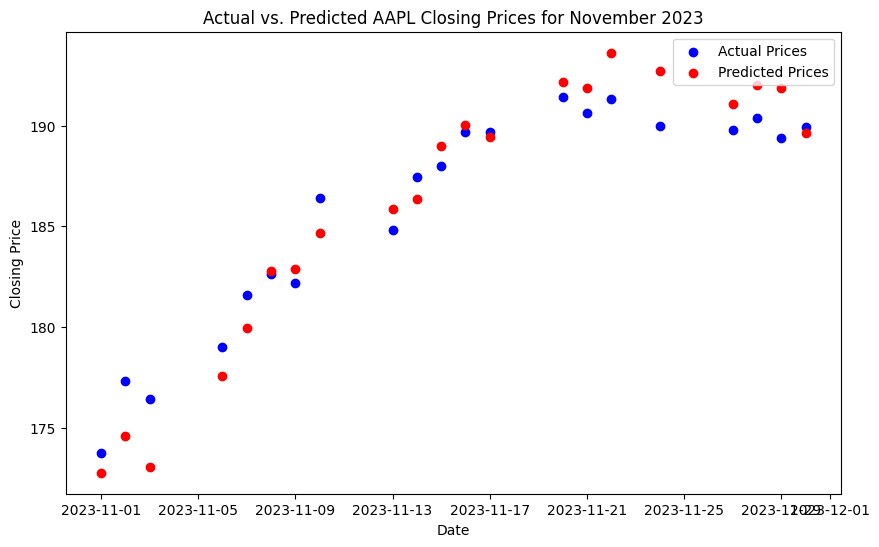

In [ ]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)

# Plot actual vs. predicted values for November 2023
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Prices')
plt.title('Actual vs. Predicted AAPL Closing Prices for November 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Average Testing MSE: 0.5748962696092658
Average Testing R-squared: 0.9822803843540224


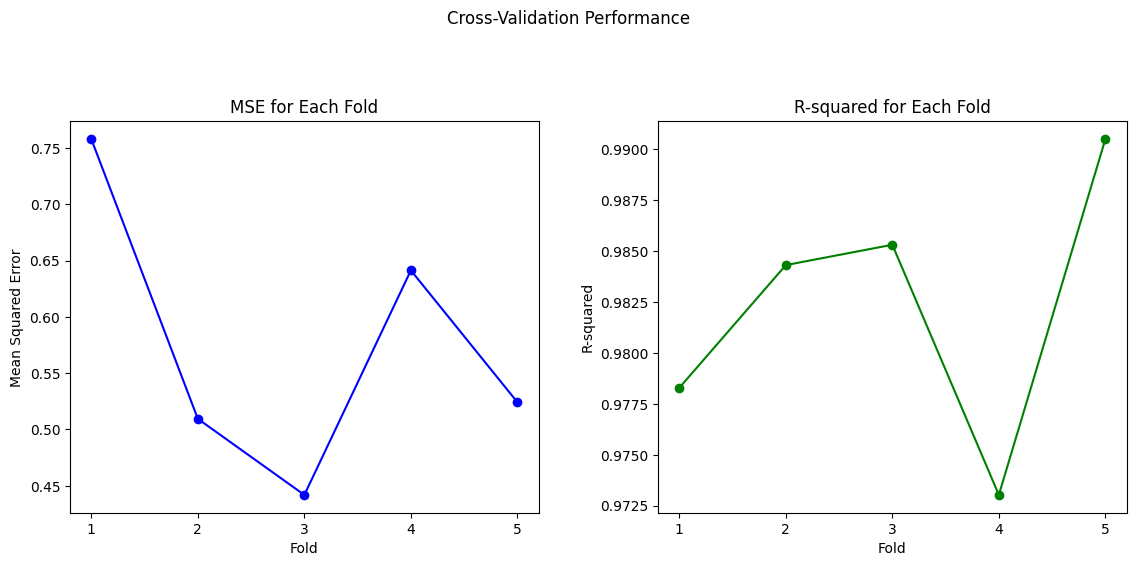

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Arrays to store scores
mse_scores = []
r2_scores = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append scores
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print average scores
print("Average Testing MSE:", np.mean(mse_scores))
print("Average Testing R-squared:", np.mean(r2_scores))


folds = range(1, len(mse_scores) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, mse_scores, marker='o', linestyle='-', color='blue')
plt.title('MSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(folds)

plt.subplot(1, 2, 2)
plt.plot(folds, r2_scores, marker='o', linestyle='-', color='green')
plt.title('R-squared for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.xticks(folds)

plt.suptitle('Cross-Validation Performance')
plt.tight_layout(pad=3.0)
plt.show()

TimeSeriesSplit is used to create training/testing splits while preserving the order of time series data.
The model is trained and evaluated on each split, and performance metrics are recorded.

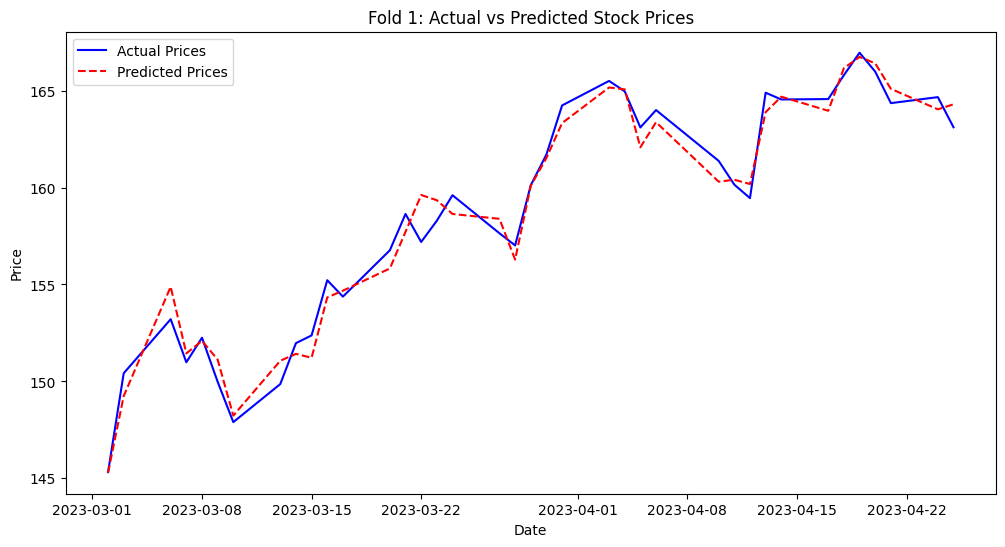

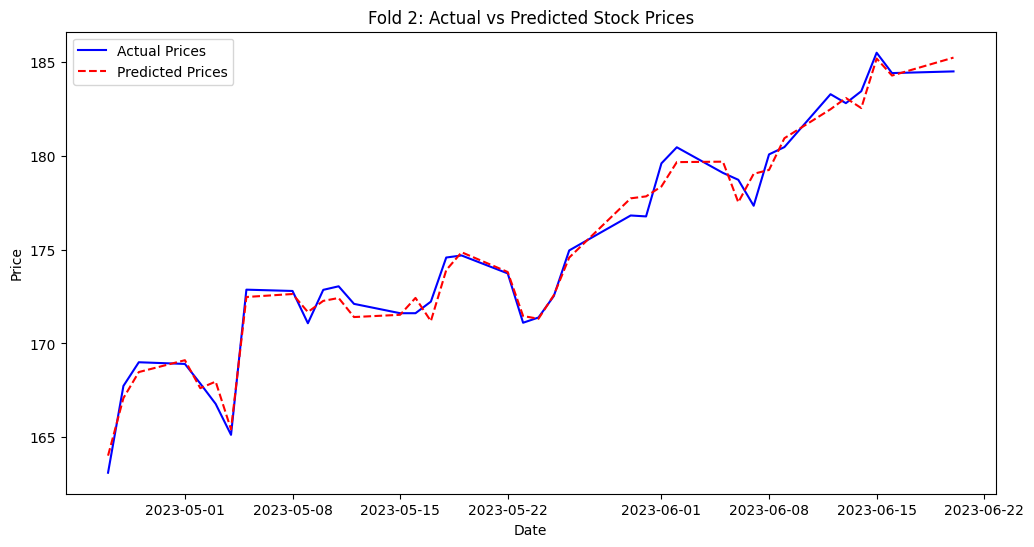

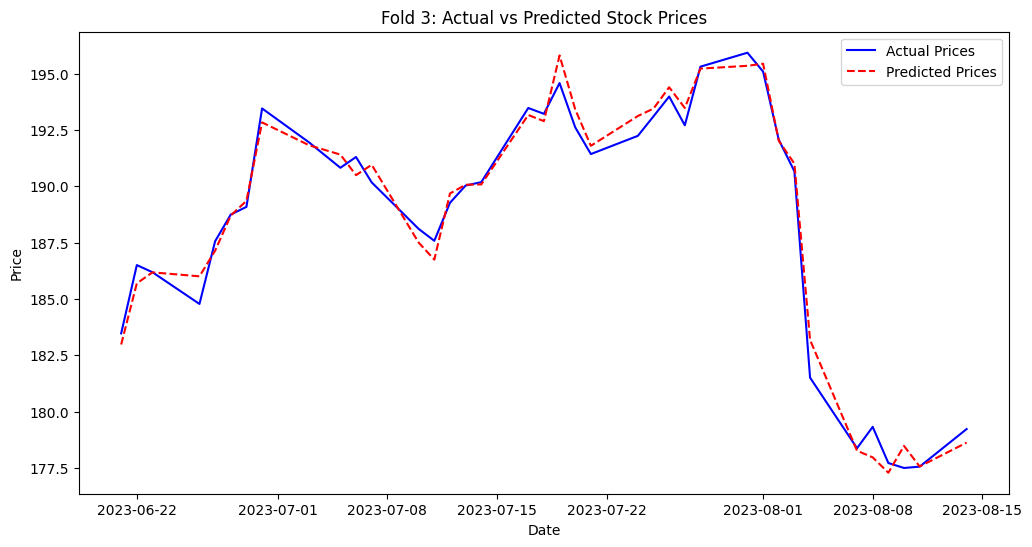

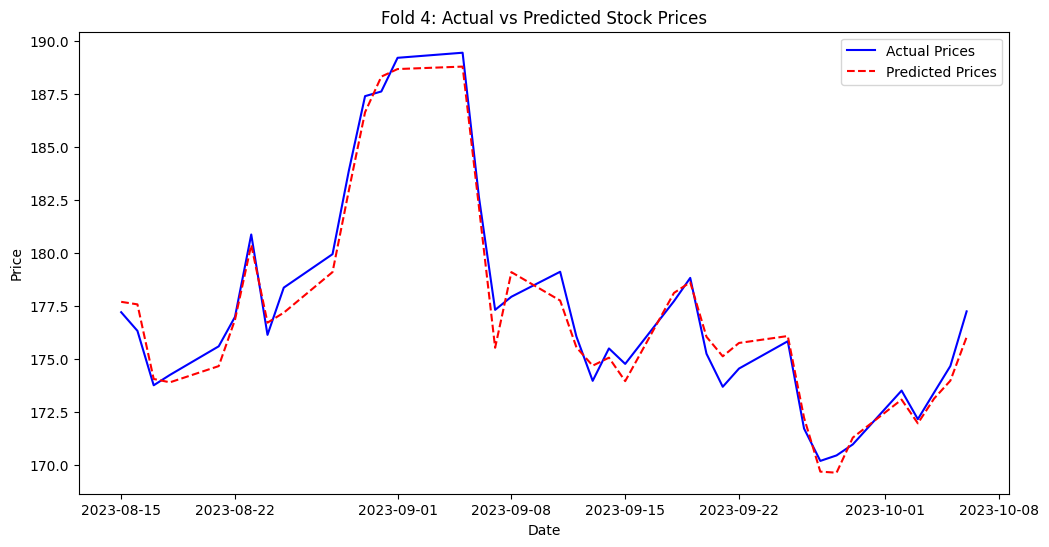

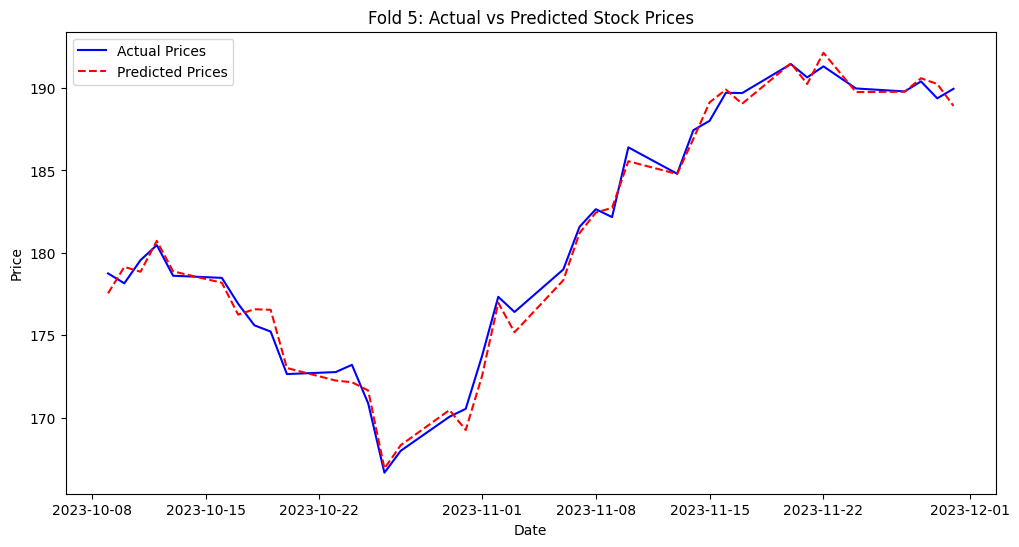

In [ ]:
import matplotlib.pyplot as plt

# Assuming the rest of your code is as provided above

# Perform time series cross-validation again
for i, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
    plt.title(f'Fold {i}: Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed
Testing MSE: 1.0890242389454154
Testing R-squared: 0.9619983083502195


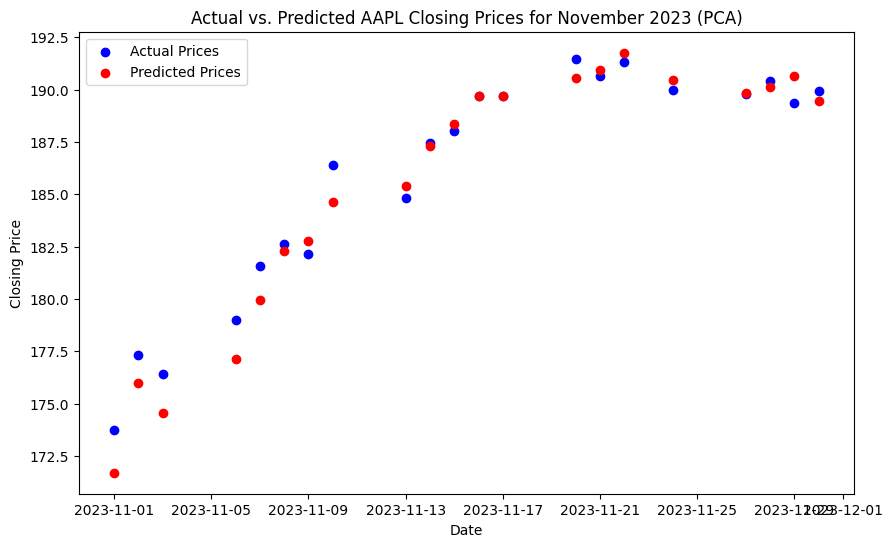

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Define training and testing data
train_df = df['2023-01-01':'2023-10-31']
test_df = df['2023-11-01':'2023-11-30']

# Features and target
X_train = train_df[['Open', 'High', 'Low', 'Volume']]
y_train = train_df['Close']
X_test = test_df[['Open', 'High', 'Low', 'Volume']]
y_test = test_df['Close']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions using the principal components
y_test_pred = model.predict(X_test_pca)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)

# Plot actual vs. predicted values for November 2023
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Prices')
plt.title('Actual vs. Predicted AAPL Closing Prices for November 2023 (PCA)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Average Testing MSE: 44.56796520907539
Average Testing R-squared: -0.3633838031467337


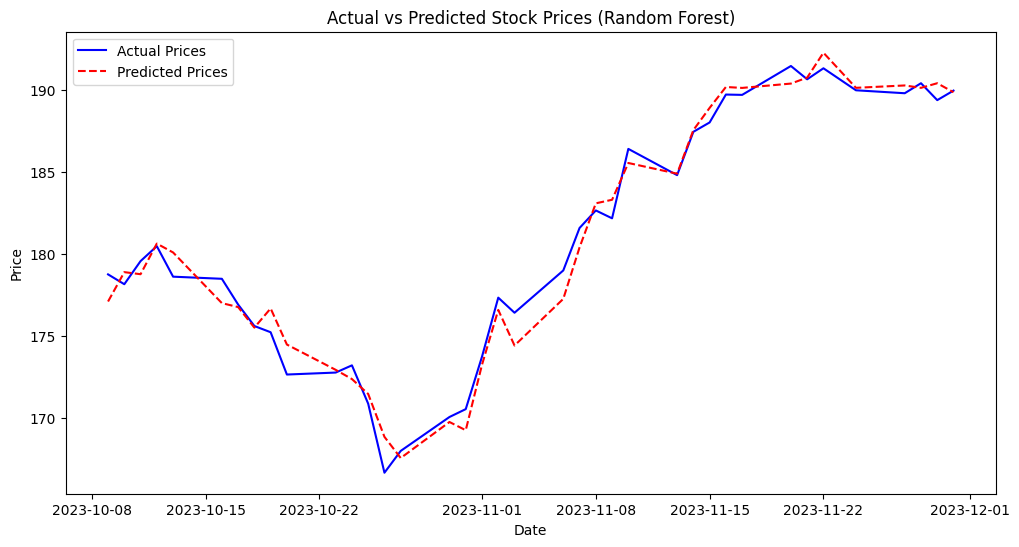

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Arrays to store scores
mse_scores = []
r2_scores = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append scores
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print average scores
print("Average Testing MSE:", np.mean(mse_scores))
print("Average Testing R-squared:", np.mean(r2_scores))

# Plotting Predicted vs Actual Prices for the Last Fold
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Possible Reasons and Solutions:
Model Complexity: Random Forest is a more complex model compared to Linear Regression. It's possible that the model is not well-tuned for the data. Adjusting hyperparameters like the number of trees (n_estimators), max depth of trees, or min samples per leaf could help.

Feature Relevance: The features used ('Open', 'High', 'Low', 'Volume') might not be sufficient or relevant enough to predict 'Close' prices. Additional features or feature engineering might be needed.

Data Size and Quality: Check if the amount of data is sufficient for training a complex model like Random Forest. Also, ensure the quality of the data.

Overfitting: While Random Forest generally handles overfitting well, it's still a possibility, especially with time series data. Check if the model is overfitting to the training data in each fold.

Inherent Unpredictability: Stock prices can be very difficult to predict due to their inherent volatility and the influence of unpredictable external factors.

Next Steps:
Hyperparameter Tuning: Experiment with different settings of the Random Forest parameters.
Feature Engineering: Consider deriving new features or including external data that might provide more insights.
Model Comparison: Compare the performance of Random Forest with other models (like Linear Regression or Gradient Boosting) to find the best approach for your data.
Cross-Validation Approach: Ensure that the approach to cross-validation is appropriate for your time series data.
Remember, predicting stock prices is inherently challenging, and high accuracy is difficult to achieve. It's important to consider the limitations of the model and the nature of financial data.

[*********************100%%**********************]  1 of 1 completed
Testing MSE: 0.8919395407129649
Testing R-squared: 0.9688756134305658


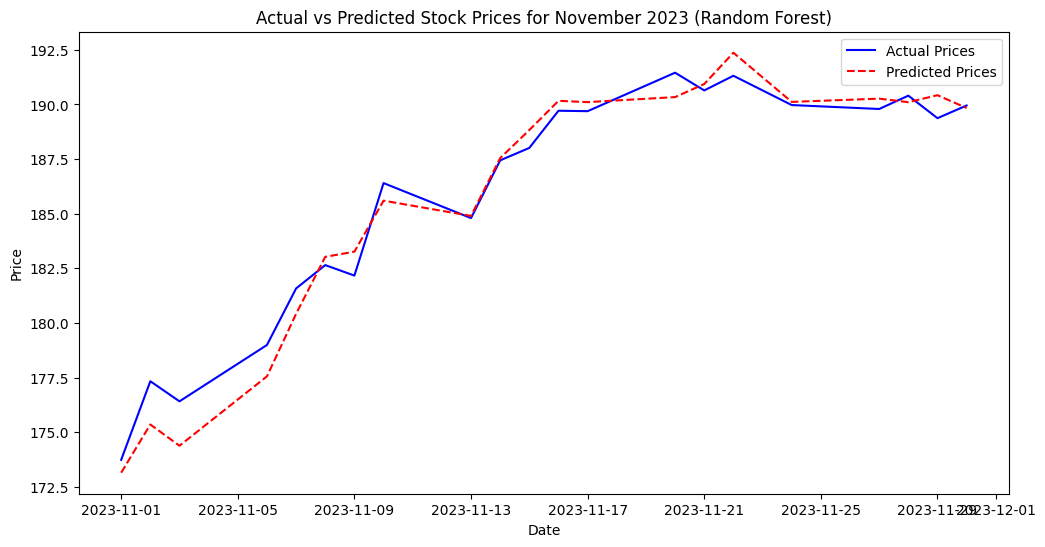

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Define training data (January to October 2023)
X_train = X['2023-01-01':'2023-10-31']
y_train = y['2023-01-01':'2023-10-31']

# Define testing data (November 2023)
X_test = X['2023-11-01':'2023-11-30']
y_test = y['2023-11-01':'2023-11-30']

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print scores
print("Testing MSE:", mse)
print("Testing R-squared:", r2)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for November 2023 (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Training and testing data
X_train = X['2023-01-01':'2023-10-31']
y_train = y['2023-01-01':'2023-10-31']
X_test = X['2023-11-01':'2023-11-30']
y_test = y['2023-11-01':'2023-11-30']

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print scores
print("Testing MSE:", mse)
print("Testing R-squared:", r2)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for November 2023 (Random Forest - Tuned)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Testing MSE: 0.7623582101328481
Testing R-squared: 0.973397376667941


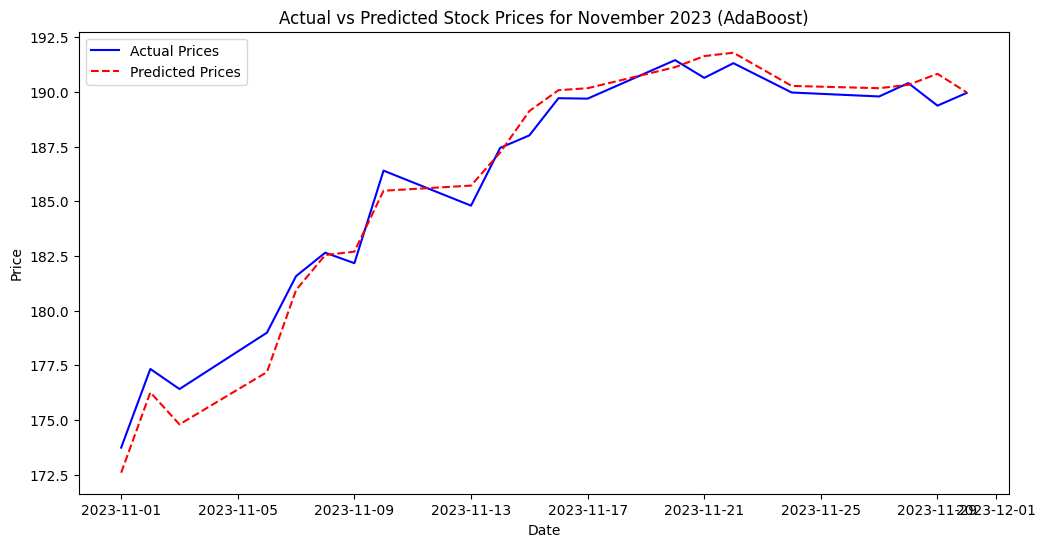

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Define training data (January to October 2023)
X_train = X['2023-01-01':'2023-10-31']
y_train = y['2023-01-01':'2023-10-31']

# Define testing data (November 2023)
X_test = X['2023-11-01':'2023-11-30']
y_test = y['2023-11-01':'2023-11-30']

# Create an AdaBoost Regressor model
# You can adjust n_estimators and learning_rate as needed
model = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=1.0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print scores
print("Testing MSE:", mse)
print("Testing R-squared:", r2)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for November 2023 (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Close - Testing MSE: 0.8930209863408299 Testing R-squared: 0.9688378761958778
Open - Testing MSE: 0.9105132600042645 Testing R-squared: 0.9777042756104506


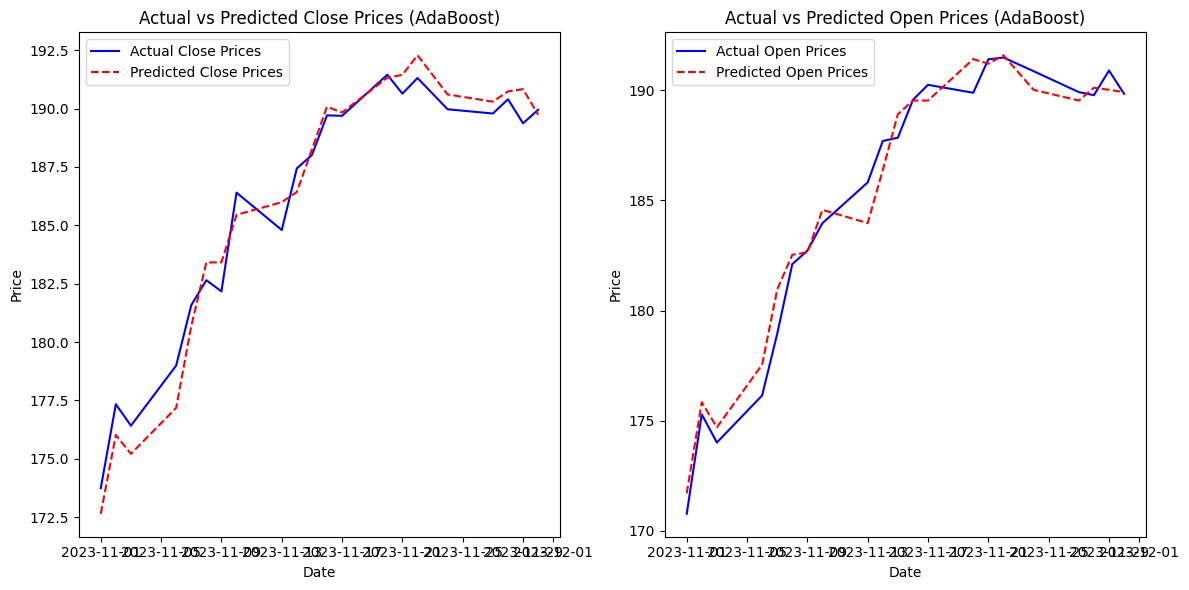

In [3]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['High', 'Low', 'Volume']]  # Features excluding 'Open' for predicting 'Close'
X_for_open = df[['Close', 'High', 'Low', 'Volume']]  # Features including 'Close' for predicting 'Open'

# Target variables
y_close = df['Close']
y_open = df['Open']

# Training and testing data for 'Close'
X_train_close = X['2023-01-01':'2023-10-31']
y_train_close = y_close['2023-01-01':'2023-10-31']
X_test_close = X['2023-11-01':'2023-11-30']
y_test_close = y_close['2023-11-01':'2023-11-30']

# Training and testing data for 'Open'
X_train_open = X_for_open['2023-01-01':'2023-10-31']
y_train_open = y_open['2023-01-01':'2023-10-31']
X_test_open = X_for_open['2023-11-01':'2023-11-30']
y_test_open = y_open['2023-11-01':'2023-11-30']

# Model for predicting 'Close'
model_close = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=1.0)
model_close.fit(X_train_close, y_train_close)
y_pred_close = model_close.predict(X_test_close)

# Model for predicting 'Open'
model_open = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=1.0)
model_open.fit(X_train_open, y_train_open)
y_pred_open = model_open.predict(X_test_open)

# Evaluate the models
mse_close = mean_squared_error(y_test_close, y_pred_close)
r2_close = r2_score(y_test_close, y_pred_close)
mse_open = mean_squared_error(y_test_open, y_pred_open)
r2_open = r2_score(y_test_open, y_pred_open)

# Print scores
print("Close - Testing MSE:", mse_close, "Testing R-squared:", r2_close)
print("Open - Testing MSE:", mse_open, "Testing R-squared:", r2_open)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test_close.index, y_test_close, label='Actual Close Prices', color='blue')
plt.plot(y_test_close.index, y_pred_close, label='Predicted Close Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_open.index, y_test_open, label='Actual Open Prices', color='blue')
plt.plot(y_test_open.index, y_pred_open, label='Predicted Open Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Open Prices (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install mplfinance

[*********************100%%**********************]  1 of 1 completed
Close - Testing MSE: 0.8930209863408299 Testing R-squared: 0.9688378761958778
Open - Testing MSE: 1.4967495982226169 Testing R-squared: 0.9633491152869273


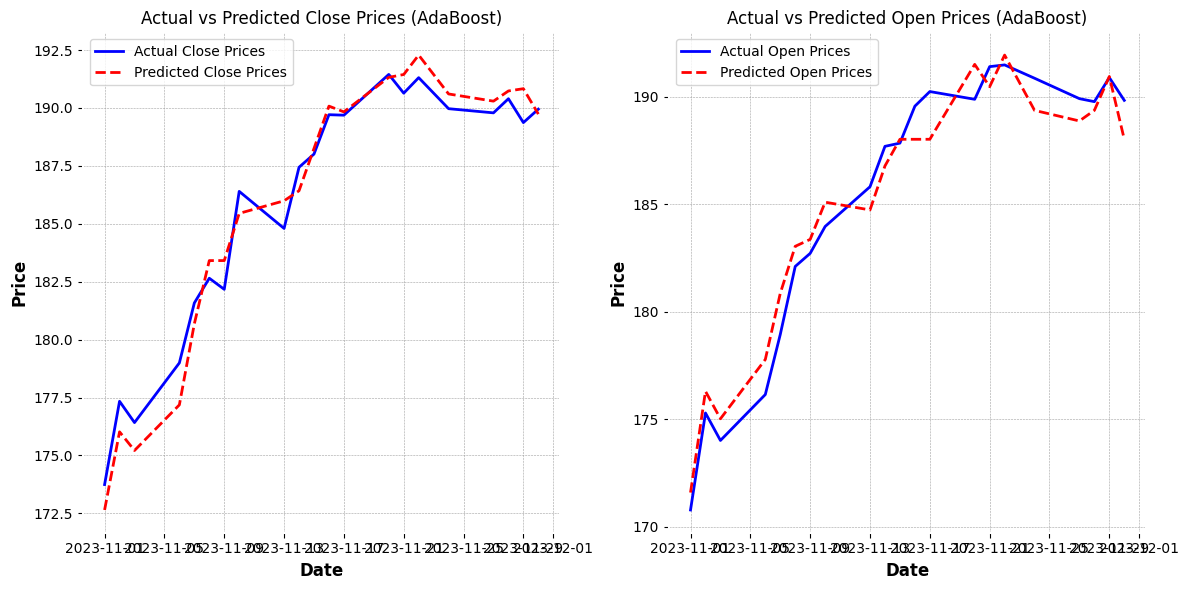

In [7]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['High', 'Low', 'Volume']]  # Features for predicting both 'Close' and 'Open'

# Target variables
y_close = df['Close']
y_open = df['Open']

# Training and testing data
X_train = X['2023-01-01':'2023-10-31']
X_test = X['2023-11-01':'2023-11-30']
y_train_close = y_close['2023-01-01':'2023-10-31']
y_test_close = y_close['2023-11-01':'2023-11-30']
y_train_open = y_open['2023-01-01':'2023-10-31']
y_test_open = y_open['2023-11-01':'2023-11-30']

# Model for predicting 'Close'
model_close = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=1.0)
model_close.fit(X_train, y_train_close)
y_pred_close = model_close.predict(X_test)

# Model for predicting 'Open'
model_open = AdaBoostRegressor(n_estimators=100, random_state=42, learning_rate=1.0)
model_open.fit(X_train, y_train_open)
y_pred_open = model_open.predict(X_test)

# Evaluate the models
mse_close = mean_squared_error(y_test_close, y_pred_close)
r2_close = r2_score(y_test_close, y_pred_close)
mse_open = mean_squared_error(y_test_open, y_pred_open)
r2_open = r2_score(y_test_open, y_pred_open)

# Print scores
print("Close - Testing MSE:", mse_close, "Testing R-squared:", r2_close)
print("Open - Testing MSE:", mse_open, "Testing R-squared:", r2_open)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test_close.index, y_test_close, label='Actual Close Prices', color='blue')
plt.plot(y_test_close.index, y_pred_close, label='Predicted Close Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_open.index, y_test_open, label='Actual Open Prices', color='blue')
plt.plot(y_test_open.index, y_pred_open, label='Predicted Open Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Open Prices (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


<ipython-input-8-e7a56651fb1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_prices['Open'] = df['Open']['2023-11-01':'2023-11-30']
<ipython-input-8-e7a56651fb1a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_prices['Close'] = df['Close']['2023-11-01':'2023-11-30']


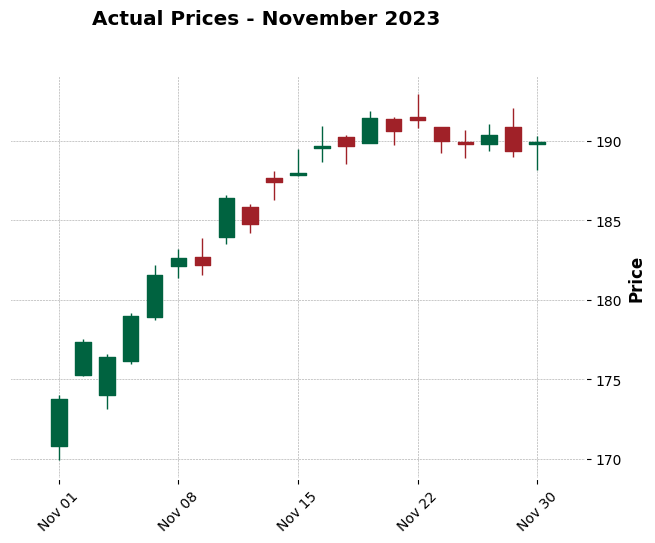

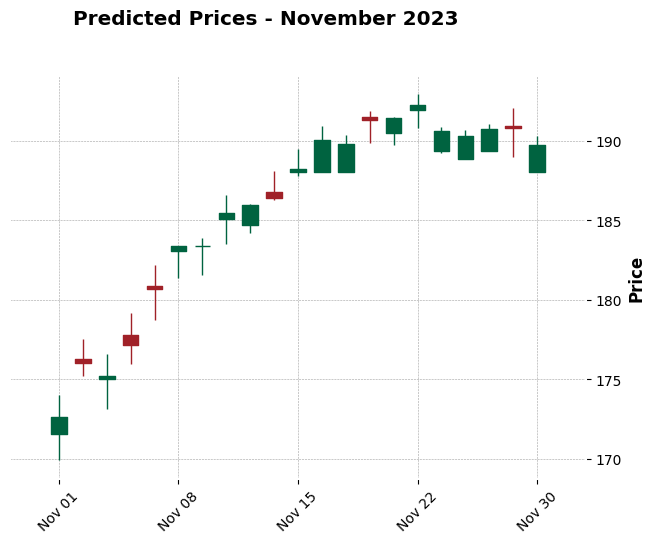

In [8]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Assuming you have these variables from your previous AdaBoost models
# y_pred_open and y_pred_close are the predicted open and close prices for November 2023

# Prepare the DataFrame for actual prices
actual_prices = df['2023-11-01':'2023-11-30']
actual_prices['Open'] = df['Open']['2023-11-01':'2023-11-30']
actual_prices['Close'] = df['Close']['2023-11-01':'2023-11-30']

# Prepare the DataFrame for predicted prices
# Use actual high and low values
predicted_prices = actual_prices.copy()
predicted_prices['Open'] = y_pred_open  # replace with your predicted open prices
predicted_prices['Close'] = y_pred_close  # replace with your predicted close prices

# Plotting
mpf.plot(actual_prices, type='candle', title='Actual Prices - November 2023', style='charles')
mpf.plot(predicted_prices, type='candle', title='Predicted Prices - November 2023', style='charles')


Hyperparameter Tuning: Experiment with different settings of the Random Forest parameters.


[*********************100%%**********************]  1 of 1 completed
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Testing MSE: 0.9067243621876768
Testing R-squared: 0.9683596944944335


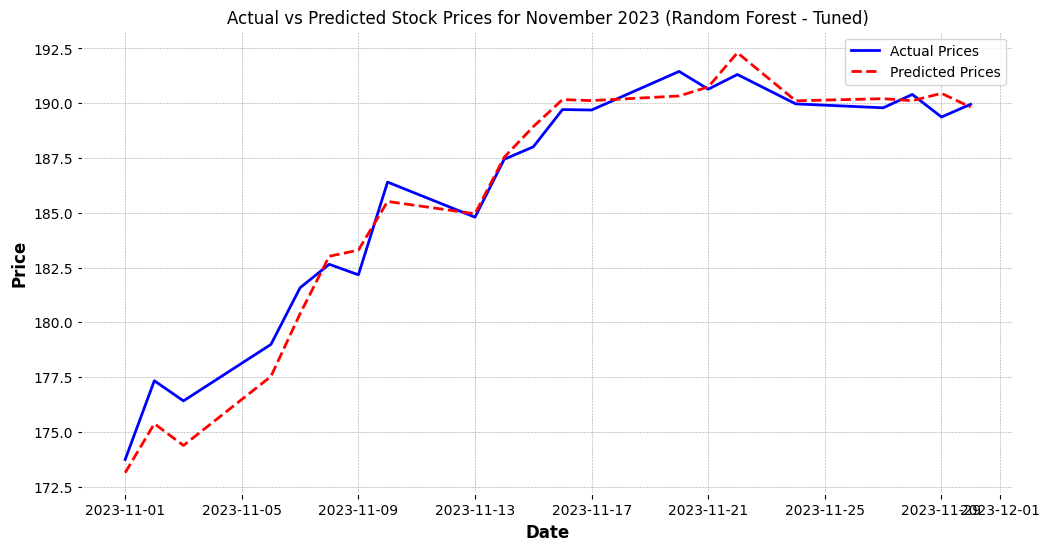

In [9]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2023-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Training and testing data
X_train = X['2023-01-01':'2023-10-31']
y_train = y['2023-01-01':'2023-10-31']
X_test = X['2023-11-01':'2023-11-30']
y_test = y['2023-11-01':'2023-11-30']

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print scores
print("Testing MSE:", mse)
print("Testing R-squared:", r2)

# Plotting Predicted vs Actual Prices for November 2023
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for November 2023 (Random Forest - Tuned)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Linear Regression - MSE: 0.6680340997729628, R²: 0.9976540059541845
Random Forest - MSE: 39.811954453130575, R²: 0.8601888614203049
Gradient Boosting - MSE: 39.059049164137456, R²: 0.8628329050786168


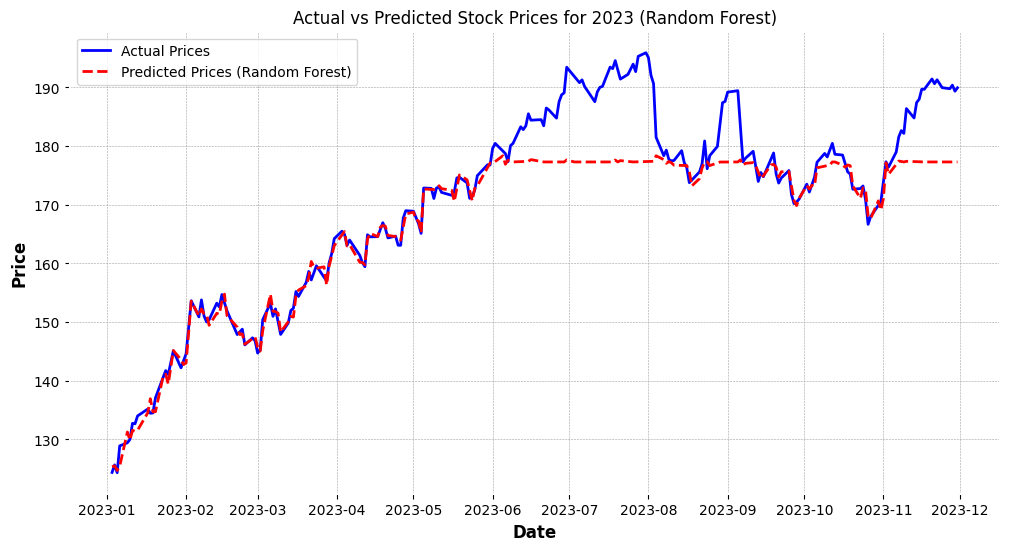

In [10]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2020-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Training data from 2020 to 2022
X_train = X[:'2022-12-31']
y_train = y[:'2022-12-31']

# Testing data for 2023
X_test = X['2023-01-01':]
y_test = y['2023-01-01':]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store evaluation metrics
performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {'MSE': mse, 'R²': r2}

# Print performance metrics
for name, metrics in performance.items():
    print(f"{name} - MSE: {metrics['MSE']}, R²: {metrics['R²']}")

# Plotting Predicted vs Actual Prices for a selected model (e.g., Random Forest)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, models['Random Forest'].predict(X_test), label='Predicted Prices (Random Forest)', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices for 2023 (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


future works to make it so that the algorithm defeults back to linear regression in periods of higher varience from the

[*********************100%%**********************]  1 of 1 completed
Linear Regression - MSE: 0.6680340997729628, R²: 0.9976540059541845
Random Forest - MSE: 39.811954453130575, R²: 0.8601888614203049
Gradient Boosting - MSE: 39.059049164137456, R²: 0.8628329050786168


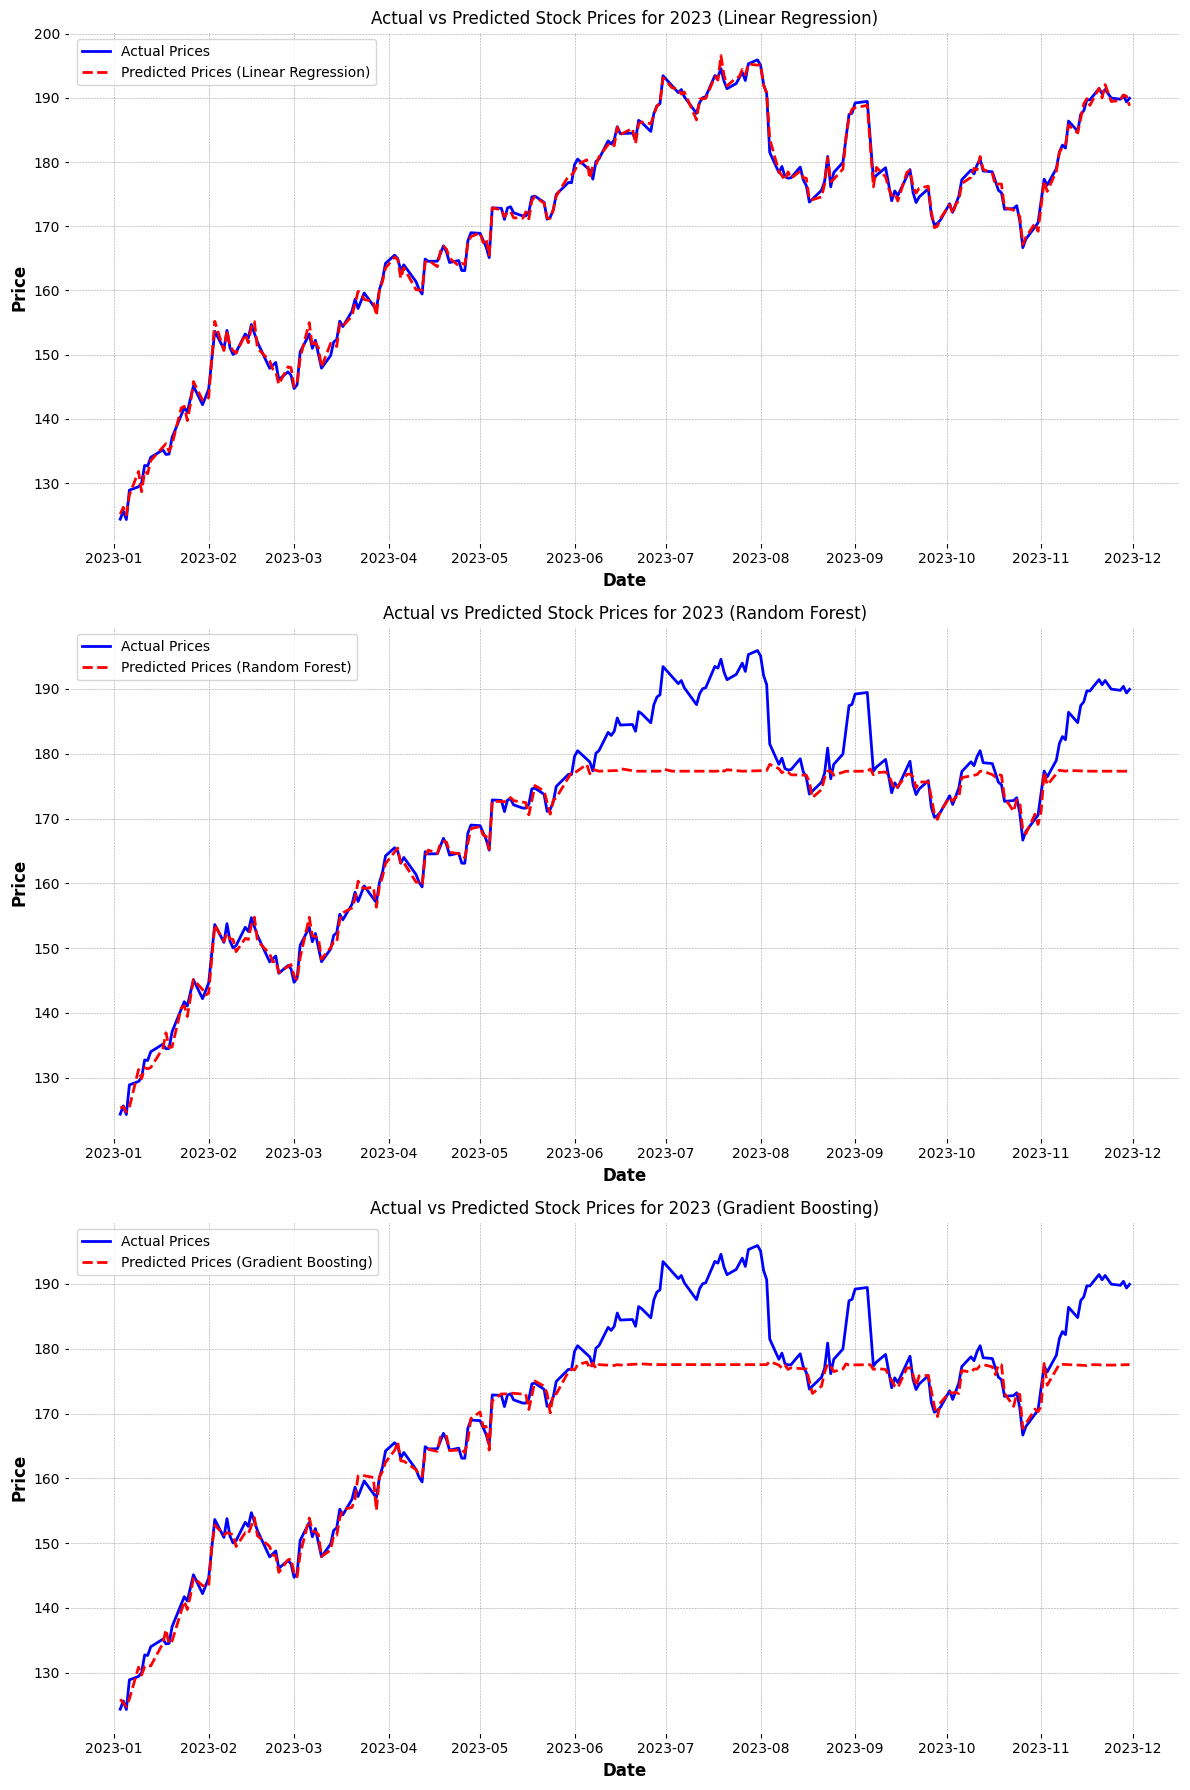

In [16]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download AAPL stock data
df = yf.download('AAPL', start="2020-01-01", end="2023-12-01", auto_adjust=True)

# Preparing the dataset
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Training data from 2020 to 2022
X_train = X[:'2022-12-31']
y_train = y[:'2022-12-31']

# Testing data for 2023
X_test = X['2023-01-01':]
y_test = y['2023-01-01':]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model, and store predictions
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions[name])
    r2 = r2_score(y_test, predictions[name])
    print(f"{name} - MSE: {mse}, R²: {r2}")

# Plotting Predicted vs Actual Prices for each model
plt.figure(figsize=(12, 18))  # Adjusted figure size

for i, (name, y_pred) in enumerate(predictions.items(), start=1):
    plt.subplot(3, 1, i)  # Adjusted for vertical layout
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, y_pred, label=f'Predicted Prices ({name})', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Stock Prices for 2023 ({name})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

Data Range: the training data did not contain many instances where prices were above 180, the Gradient Boost and RandomForest models might not have learned to predict values in that range effectively.



[*********************100%%**********************]  1 of 1 completed


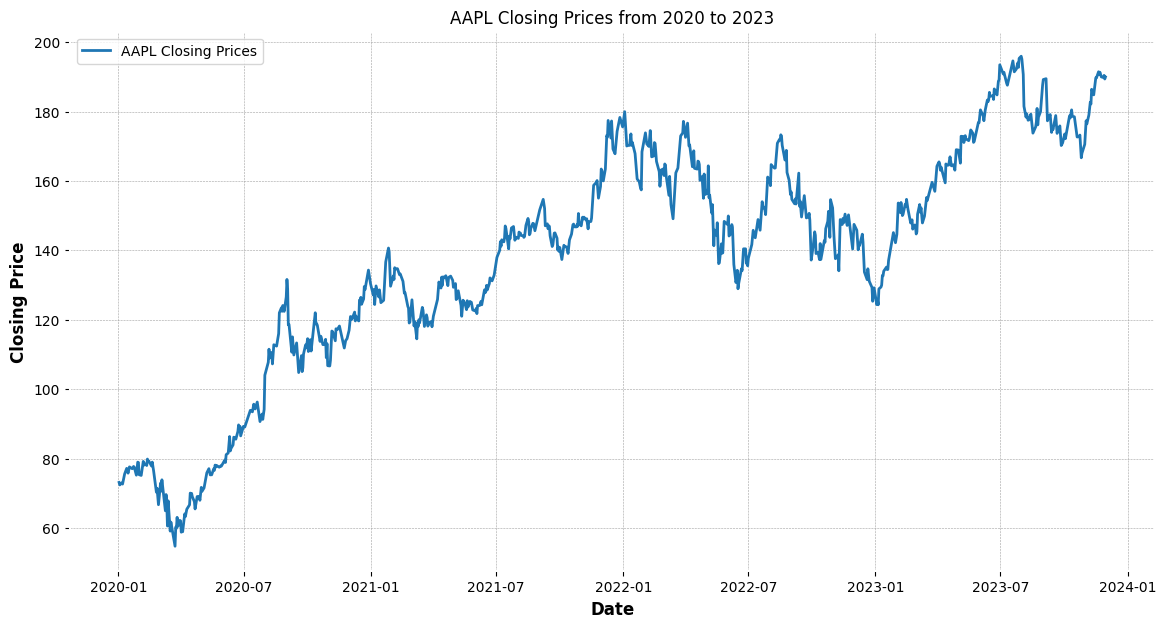

(DatetimeIndex(['2023-06-02', '2023-06-08', '2023-06-09', '2023-06-12',
                '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
                '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
                '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
                '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
                '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12',
                '2023-07-13', '2023-07-14', '2023-07-17', '2023-07-18',
                '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24',
                '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28',
                '2023-07-31', '2023-08-01', '2023-08-02', '2023-08-03',
                '2023-08-04', '2023-08-23', '2023-08-29', '2023-08-30',
                '2023-08-31', '2023-09-01', '2023-09-05', '2023-09-06',
                '2023-10-12', '2023-11-07', '2023-11-08', '2023-11-09',
                '2023-11-10', '2023-11-13', '2023-11-14', '2023-

In [21]:
df = yf.download('AAPL', start="2020-01-01", end="2023-12-01", auto_adjust=True)

# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='AAPL Closing Prices')
plt.title('AAPL Closing Prices from 2020 to 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Checking if the price was ever above 180
price_above_180 = df['Close'] > 180
dates_above_180 = df[price_above_180].index
price_above_180_exist = price_above_180.any()
dates_above_180, price_above_180_exist

In [18]:
# Assuming 'df' is your DataFrame containing the AAPL data
price_above_180 = df['Close'] > 180
any_price_above_180 = price_above_180.any()  # This will be True if any price was above 180

# If you want to know the specific dates when the price was above 180
dates_when_above_180 = df[price_above_180].index.tolist()


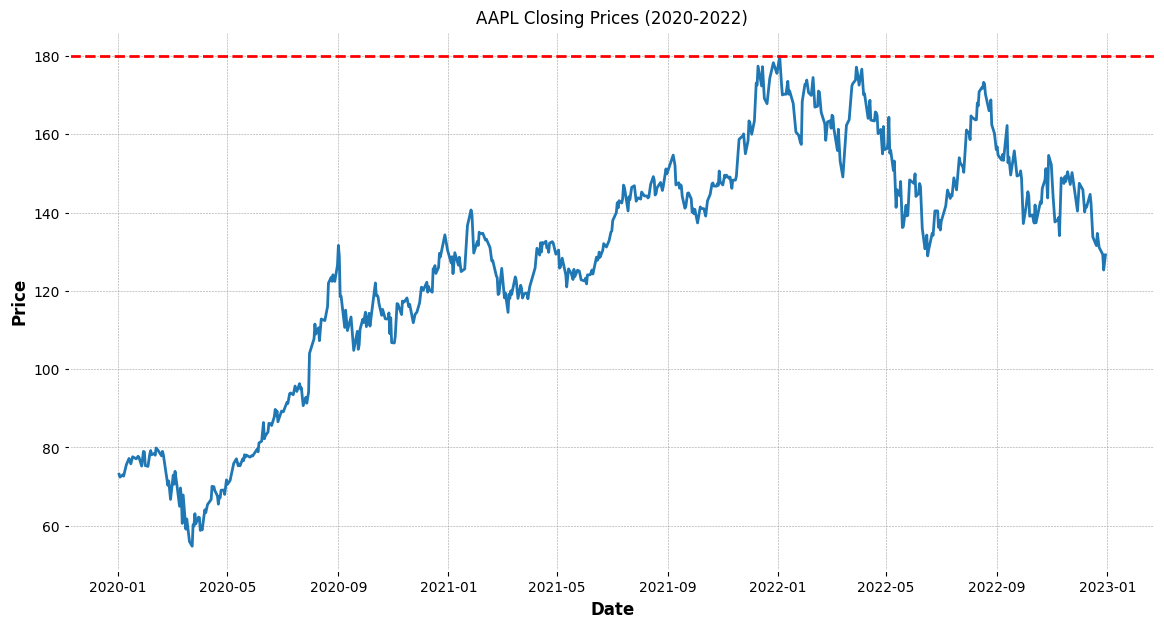

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('AAPL Closing Prices (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.axhline(y=180, color='r', linestyle='--')  # Add a horizontal line at price 180
plt.show()
